# 项目：用逻辑回归预测泰坦尼克号幸存情况

## 分析目标

此数据分析报告的目的是，基于泰坦尼克号乘客的性别和船舱等级等属性，对幸存情况进行逻辑回归分析，从而能利用得到的模型，对未知幸存情况的乘客，根据属性预测是否从沉船事件中幸存。

## 简介

> 泰坦尼克号（英语：RMS Titanic）是一艘奥林匹克级邮轮，于1912年4月首航时撞上冰山后沉没。泰坦尼克号是同级的3艘超级邮轮中的第2艘，与姐妹船奥林匹克号和不列颠号为白星航运公司的乘客们提供大西洋旅行。

> 泰坦尼克号由位于北爱尔兰贝尔法斯特的哈兰·沃尔夫船厂兴建，是当时最大的客运轮船，由于其规模相当一艘现代航空母舰，因而号称“上帝也沉没不了的巨型邮轮”。在泰坦尼克号的首航中，从英国南安普敦出发，途经法国瑟堡-奥克特维尔以及爱尔兰昆士敦，计划横渡大西洋前往美国纽约市。但因为人为错误，于1912年4月14日船上时间夜里11点40分撞上冰山；2小时40分钟后，即4月15日凌晨02点20分，船裂成两半后沉入大西洋，死亡人数超越1500人，堪称20世纪最大的海难事件，同时也是最广为人知的海难之一。

数据集包括两个数据表：`titianic_train.csv`和`titanic_test.csv`。

`titianic_train.csv`记录了超过八百位泰坦尼克号乘客在沉船事件后的幸存情况，以及乘客的相关信息，包括所在船舱等级、性别、年龄、同乘伴侣/同胞数量、同乘父母/孩子数量，等等。

`titanic_test.csv`只包含乘客（这些乘客不在`titianic_train.csv`里）相关信息，此文件可以被用于预测乘客是否幸存。

`titianic_train.csv`每列的含义如下：
- PassengerId：乘客ID
- survival：是否幸存
   - 0	否
   - 1	是
- pclass：船舱等级
   - 1	一等舱
   - 2	二等舱
   - 3  三等舱
- sex：性别
- Age：年龄
- sibsp：同乘伴侣/同胞数量
- parch：同乘父母/孩子数量
- ticket：船票号
- fare：票价金额
- cabin：船舱号
- embarked：登船港口
   - C  瑟堡
   - Q  皇后镇
   - S  南安普敦
   
   
`titianic_test.csv`每列的含义和上面相同，但不具备survival变量的数据，即是否幸存。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **1.讀取數據**

In [2]:
#from google.colab import files  ###要把檔案上傳到colab才可以讀取文件
#uploaded = files.upload()
original_train = pd.read_csv(r"C:\Users\User\Desktop\python\titanic_train.csv")
original_test = pd.read_csv(r"C:\Users\User\Desktop\python\titanic_test.csv")

In [3]:
#original_train = pd.read_csv('titanic_train.csv')
#original_test = pd.read_csv('titanic_test.csv')

In [4]:
original_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
original_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#

## **2.評估和清理數據**

### 2.1.1 首先對`original_train`進行整理

#### 為了區分開經過清理的資料和原始的資料，我們創建新的變數`cleaned_train`

In [6]:

cleaned_train = original_train.copy()
cleaned_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


#### `cleaned_train`符合評估數據整齊的基本要件

#

### 2.1.2 數據乾淨度

In [7]:
cleaned_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### 我們發現，`Age`,`Cabin`和`Embarked`存在缺失值，需要進一步處理。
#### `PassengerId`應為字符串並非數字。
#### `Survived`,`Pclass`,`Sex`和`Embarked`以`category`類型。

In [8]:
cleaned_train["PassengerId"] = cleaned_train["PassengerId"].astype("str")

In [9]:
cleaned_train['Survived'] = cleaned_train['Survived'].astype("category")
cleaned_train['Pclass'] = cleaned_train['Pclass'].astype("category")
cleaned_train['Sex'] = cleaned_train['Sex'].astype("category")
cleaned_train['Embarked'] = cleaned_train['Embarked'].astype("category")

In [10]:
cleaned_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    object  
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    category
dtypes: category(4), float64(2), int64(2), object(4)
memory usage: 59.8+ KB


#

### 2.1.3 處理缺失數據

#### 分別處理`Age`,`Cabin`和`Embarked`的缺失值

In [11]:
cleaned_train.query("Age.isna()")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


#### 有177條觀察值的年齡變量缺失，佔總體數據比例20%左右。由於這些觀察值數量較多，且的其它變量仍然能為分析提供價值，我們最好保留這些行。
#### 但由於我們後面需要用到的邏輯回歸函數Logit不允許數據中包含缺失值，所以用乘客年齡平均值對缺失值進行填充。


In [12]:
average_age = cleaned_train['Age'].mean()
cleaned_train['Age'] = cleaned_train['Age'].fillna(average_age)
##.fillna(average_age) 表示：將Age欄位中所有的缺失值（NaN） 用average_age的值來填補。把這個新的欄位（沒有缺失值了）賦值回原本的Age欄位。
cleaned_train['Age'].isna().sum()

np.int64(0)

In [13]:
cleaned_train.query("Cabin.isna()")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.000000,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.000000,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S


#### 有687條觀察值的船艙號變量缺失，說明船艙號數據在大部分觀察值中都是未知的，所以不能刪除這些觀察值。
#### 此外，我們認為船艙號並不是影響生還概率的關鍵因素，不會被納入邏輯回歸的自變量內，即使缺失也不會影響建立模型，因此可以保留這些觀察值。


In [14]:
cleaned_train.query("Embarked.isna()")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


#### 僅有兩條觀察值的登船港口變量缺失，但我們認為登船港口並不是影響生還概率的關鍵因素，不會被納入邏輯回歸的自變量內，即使缺失也不會影響建立模型，因此可以保留這些觀察值。

#

### 2.1.4 處理重複數據

#### 根據數據變量的含義以及內容來看，`PassengerId`是乘客的唯一標識符，不應該存在重復，因此查看是否存在重復值。

In [15]:
cleaned_train['PassengerId'].duplicated().sum()

np.int64(0)

#### 輸出結果為0，說明不存在重復值。

#


### 2.1.5 處理不一致數據

`Survived`,`Pclass`,`Sex`和`Embarked`的分類變量都有可能存在不一致。

In [16]:
cleaned_train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [17]:
cleaned_train['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [18]:
cleaned_train['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [19]:
cleaned_train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

#### 從以上輸出結果來看，均不存在不一致數據。

#

### 2.1.6 處理無效或錯誤數據

In [20]:
cleaned_train.describe()

,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,13.002015,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.910400
50%,29.699118,0.000000,0.000000,14.454200
75%,35.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


#### 乘客年齡平均為30歲左右，最大值為80歲，最小值為0.42歲。同乘伴侶/同胞數量最大值為8個，最小為0個。同乘父母/孩子數量最大值為6個，最小值為0個。船票價格平均為32元，最大值為512元，最小值為0元，猜測0元表示增票。數據不存在脫離現實的數值。

#

## **3.整理數據**

#### 對數據的整理，與分析方向緊密相關。此次數據分析目標是，根據泰坦尼克號乘客的相關信息，預測沈船事件發生後的生還概率。
#### 數據變量包含乘客同乘伴侶/同胞數量，以及同乘父母/孩子數量，這些可以幫助計算出船上家庭成員的數量。我們對同乘家庭成員數量是否會顯著影響幸存感興趣，因此可以創建一個新的變量，記錄這一數值。


In [21]:
cleaned_train['FamilyNum'] = cleaned_train['SibSp'] + cleaned_train['Parch']
cleaned_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyNum
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C,1


#


## **4.探索數據**

#### 在著手邏輯回歸分析之前，我們可以先借助數據可視化，探索數值變量的分布，以及與乘客是否幸存存在相關性的變量，為後續的進一步分析提供方向。

In [22]:
sns.set_palette("pastel")

In [23]:
# 設置圖表尺寸
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

### 4.1 幸存比例

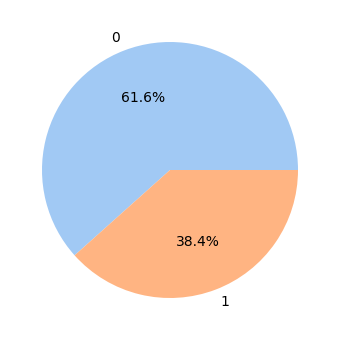

In [24]:
survived_count = cleaned_train['Survived'].value_counts()
survived_label = survived_count.index
plt.pie(survived_count, labels=survived_label, autopct='%.1f%%')
plt.show()

#### 從以上餅圖來看，泰坦尼克號遇難乘客多於幸存乘客，比例約為3:2。

#



### 4.2 乘客年齡

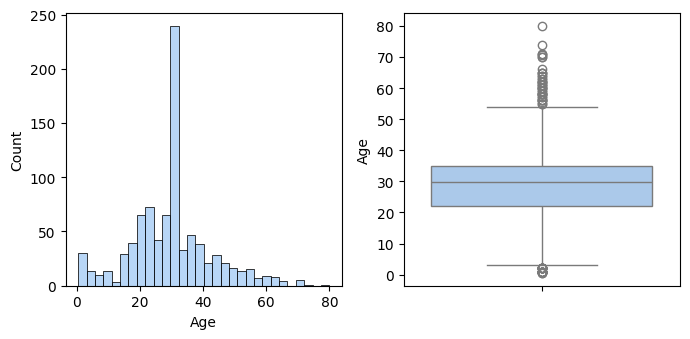

In [25]:
figure, axes = plt.subplots(1, 2)
sns.histplot(cleaned_train, x='Age', ax=axes[0])
sns.boxplot(cleaned_train, y='Age', ax=axes[1])
plt.show()

#### 數乘客年齡位於20歲到40歲之間，但有不少老年乘客以及嬰兒。

#


### 4.3 乘客年齡與是否幸存

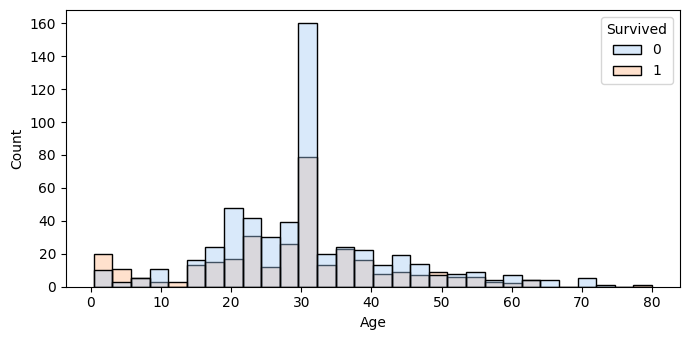

In [26]:
sns.histplot(cleaned_train, x='Age', hue='Survived', alpha=0.4)
##顏色（hue）：依照 Survived 欄位分組：
#Survived = 0（死亡）可能是紅色
#Survived = 1（存活）可能是藍色
#alpha=0.4：讓兩組顏色可以「重疊」並看到交集，透明度較高使圖更清晰
plt.show()

#### 從乘客年齡直方圖來看，只有嬰兒群體幸存比例較高，絕大部分其餘年齡段都是遇難人數多於幸存人數。

#


### 4.4 船票金額分佈

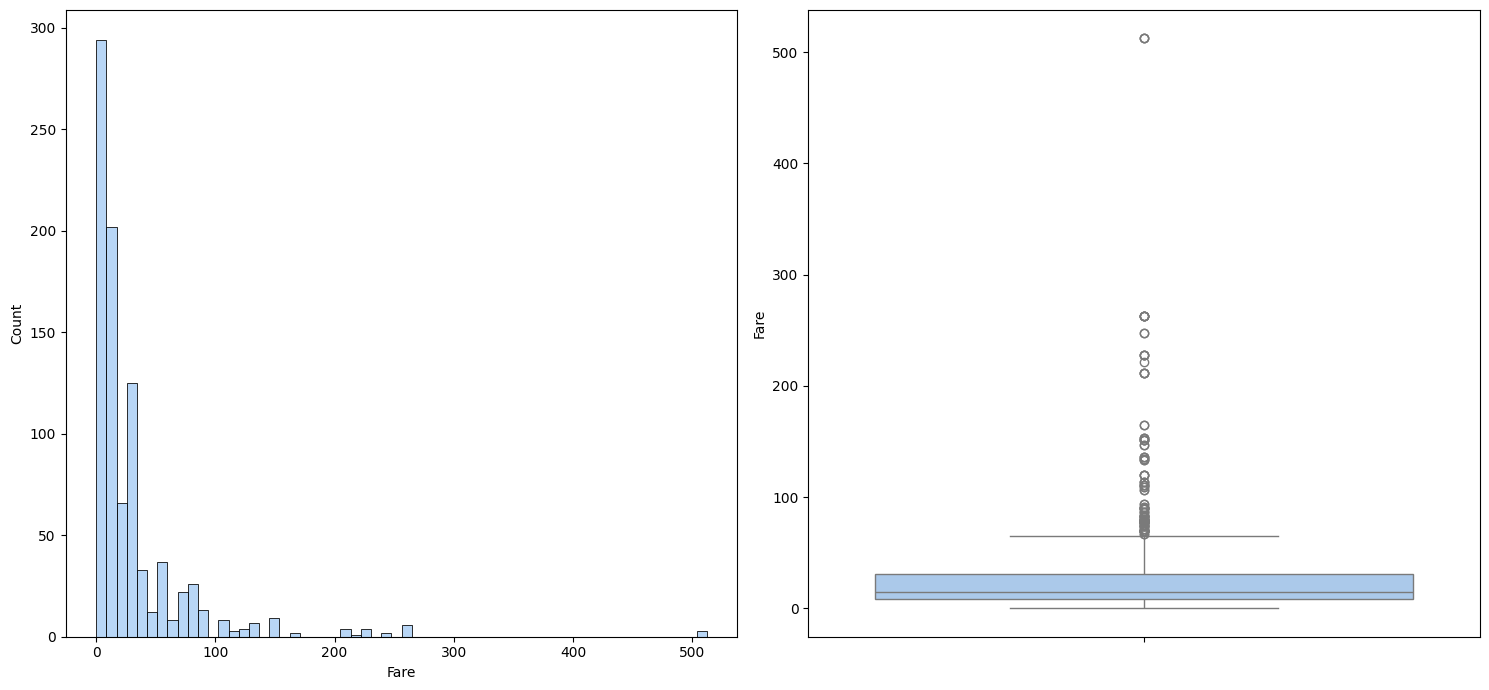

In [27]:
figure, axes = plt.subplots(1, 2, figsize=[15, 7])
sns.histplot(cleaned_train, x='Fare', ax=axes[0])
sns.boxplot(cleaned_train, y='Fare', ax=axes[1])
plt.show()

#### 船票金額呈右偏態分布，說明數據集中的大多數船票價格中等，但有一些票價很高的極端值，使得均值被拉高。

#

### 4.5 船票金額与是否幸存

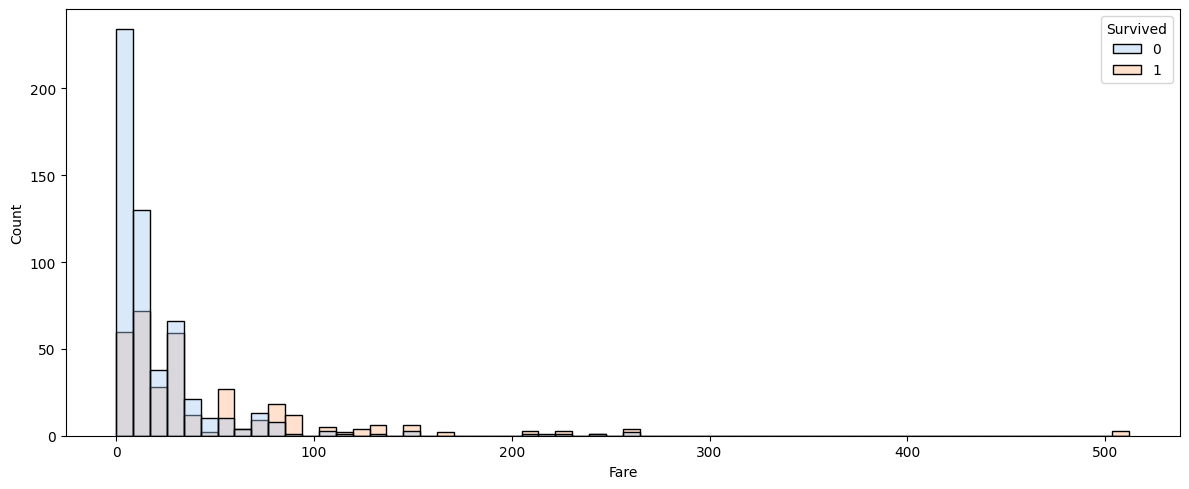

In [28]:
plt.subplots(1, 1, figsize=[12, 5])
sns.histplot(cleaned_train, x='Fare', hue='Survived', alpha=0.4)
plt.show()

#### 船票較高的乘客相對船票較低的乘客的幸存較大

#

### 4.6 船艙等級與是否幸存的關係

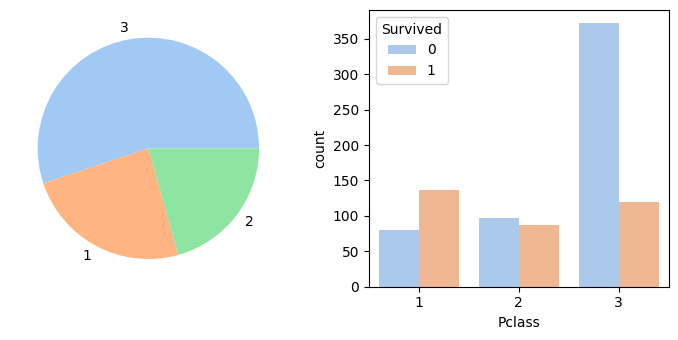

In [29]:
figure, axes = plt.subplots(1, 2)
pclass_count = cleaned_train['Pclass'].value_counts()
pclass_label = pclass_count.index
axes[0].pie(pclass_count, labels=pclass_label)
sns.countplot(cleaned_train, x='Pclass', hue='Survived', ax=axes[1])
plt.show()

#### 從是否幸存與船艙等級之間的柱狀圖來看，船艙等級低的乘客中遇難比例更大，船艙等級高的乘客中幸存比例更大。

#

### 4.7 性別與是否幸存的關係

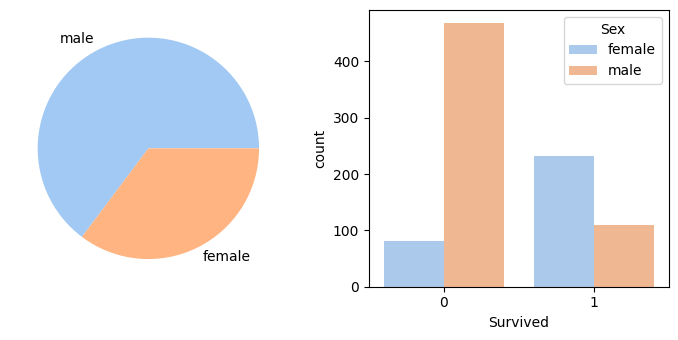

In [30]:
figure, axes = plt.subplots(1, 2)
sex_count = cleaned_train['Sex'].value_counts()
sex_label = sex_count.index
axes[0].pie(sex_count, labels=sex_label)
sns.countplot(cleaned_train, x='Survived', hue='Sex', ax=axes[1])
plt.show()

#### 從是否幸存與性別之間的柱狀圖來看，男性乘客中遇難比例更大，女性乘客中幸存比例更大。

#

### 4.8 登船港口與是否幸存的關係

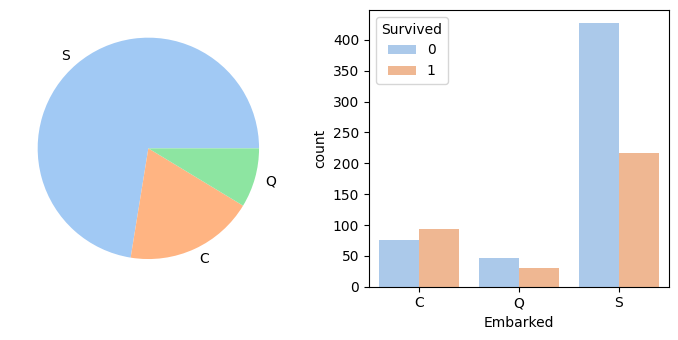

In [31]:
figure, axes = plt.subplots(1, 2)
embarked_count = cleaned_train['Embarked'].value_counts()
embarked_label = embarked_count.index
axes[0].pie(embarked_count, labels=embarked_label)
sns.countplot(cleaned_train, x='Embarked', hue='Survived', ax=axes[1])
plt.show()

#### 從是否幸存與登船港口之間的柱狀圖來看，瑟堡登船的乘客，幸存數量大於遇難數量，而皇后鎮和南安普敦則相反。

#

### 4.9 家庭成員數量與是否幸存的關係

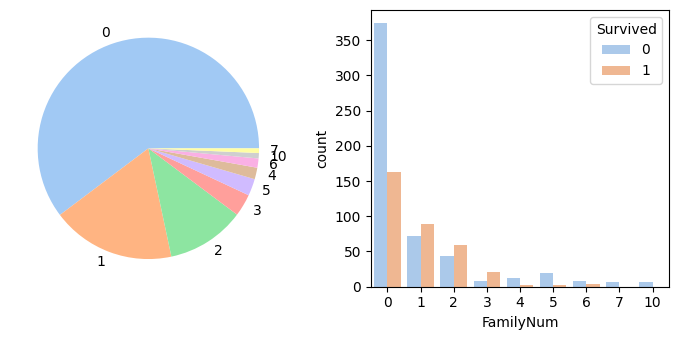

In [32]:
figure, axes = plt.subplots(1, 2)
familyNum_count = cleaned_train['FamilyNum'].value_counts()
familyNum_label = familyNum_count.index
axes[0].pie(familyNum_count, labels=familyNum_label)
sns.countplot(cleaned_train, x='FamilyNum', hue='Survived', ax=axes[1])
plt.show()

#### 從是否幸存與乘客家庭成員之間的柱狀圖來看，獨身的乘客中遇難的多於幸存的。從有攜帶家庭成員的乘客來看，家庭成員在1～3位之間的幸存人數超過遇難人數，但同乘家庭成員超過3位後，遇難的更多。

#

## **5.分析數據**

#### 在分析步驟中，我們將利用以上清理後到的數據，進行邏輯回歸分析，目標是得到一個可以根據泰坦尼克號乘客各個屬性，對沈船事件後幸存情況進行預測的數學模型。

#### 我們先引入做邏輯回歸所需的模塊。

In [33]:
import statsmodels.api as sm

#### 然後可以創建一個新的DataFramelr_train，讓它作為我們進邏輯性回歸分析所用的數據。

#### 和cleaned_train區分開的原因是，我們在進行回歸分析前，還可能需要對數據進行一些準備，比如引入虛擬變量，這些都可以在lr_train上執行。


In [34]:
lr_train = cleaned_train.copy()
lr_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyNum
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C,1


#### 移除大概率不會影響乘客幸存概率的變量。

In [35]:
lr_train = lr_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)
lr_train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilyNum
0,0,3,male,22.000000,1,0,7.2500,1
1,1,1,female,38.000000,1,0,71.2833,1
2,1,3,female,26.000000,0,0,7.9250,0
3,1,1,female,35.000000,1,0,53.1000,1
4,0,3,male,35.000000,0,0,8.0500,0
5,0,3,male,29.699118,0,0,8.4583,0
6,0,1,male,54.000000,0,0,51.8625,0
7,0,3,male,2.000000,3,1,21.0750,4
8,1,3,female,27.000000,0,2,11.1333,2
9,1,2,female,14.000000,1,0,30.0708,1


#### 數據里還存在分類變量，無法直接建立邏輯回歸模型。我們需要引入虛擬變量，也就是用0和1分別表示是否屬於該類別。

In [36]:
lr_train = pd.get_dummies(lr_train, drop_first=True, columns=['Pclass', 'Sex'], dtype=int)
lr_train.head(10)

,Survived,Age,SibSp,Parch,Fare,FamilyNum,Pclass_2,Pclass_3,Sex_male
0,0,22.000000,1,0,7.2500,1,0,1,1
1,1,38.000000,1,0,71.2833,1,0,0,0
2,1,26.000000,0,0,7.9250,0,0,1,0
3,1,35.000000,1,0,53.1000,1,0,0,0
4,0,35.000000,0,0,8.0500,0,0,1,1
5,0,29.699118,0,0,8.4583,0,0,1,1
6,0,54.000000,0,0,51.8625,0,0,0,1
7,0,2.000000,3,1,21.0750,4,0,1,1
8,1,27.000000,0,2,11.1333,2,0,1,0
9,1,14.000000,1,0,30.0708,1,1,0,0


#### 接下來，我們要把因變量和自變量劃分出來。
#### 因變量是`Survived`變量，因為我們進行邏輯回歸的目的，是根據其它可能對乘客生還概率有影響的變量，來預測幸存情況。


In [37]:
y = lr_train['Survived']

#### 我們可以把除`Survived`之外的先納入自變量，但需要查看它們之間的相關性。如果其中有些變量之間相關性很高，會導致共線性。

In [38]:
X = lr_train.drop(['Survived'], axis=1)
X.corr().abs() > 0.8

,Age,SibSp,Parch,Fare,FamilyNum,Pclass_2,Pclass_3,Sex_male
Age,True,False,False,False,False,False,False,False
SibSp,False,True,False,False,True,False,False,False
Parch,False,False,True,False,False,False,False,False
Fare,False,False,False,True,False,False,False,False
FamilyNum,False,True,False,False,True,False,False,False
Pclass_2,False,False,False,False,False,True,False,False
Pclass_3,False,False,False,False,False,False,True,False
Sex_male,False,False,False,False,False,False,False,True


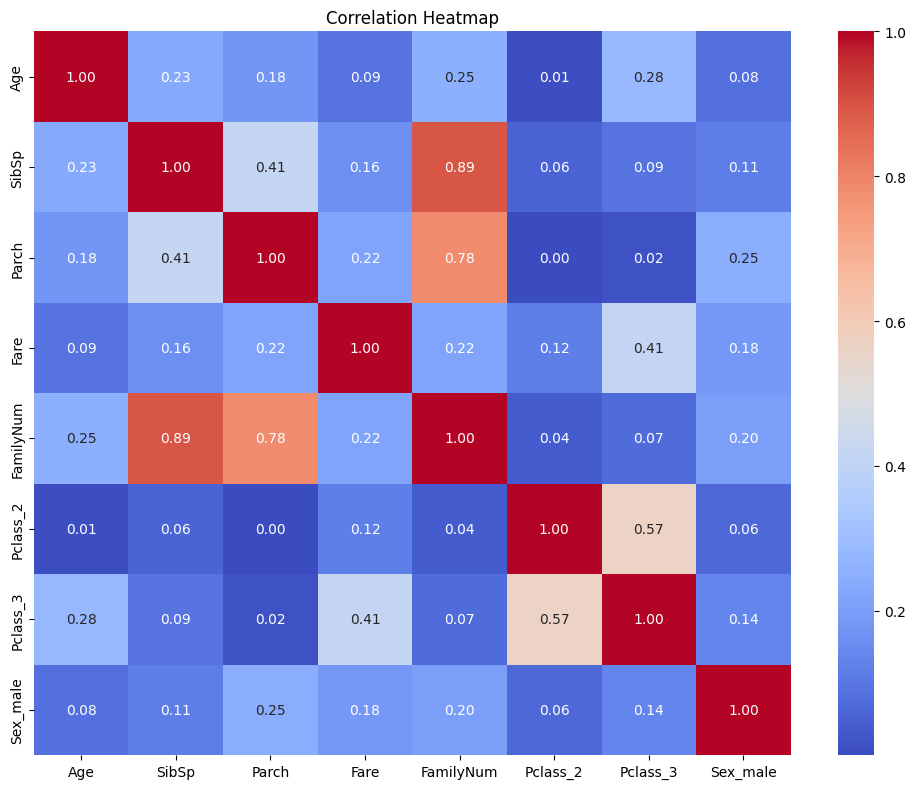

In [39]:
corr_matrix = X.corr().abs()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f")
#cmap='coolwarm'	指定顏色主題（colormap）。「coolwarm」是常用的紅藍漸層色系：
#🔵 藍色 → 負相關（-1）
#⚪ 白色 → 無相關（0）
#🔴 紅色 → 正相關（+1）
#annot=True	在每個格子中顯示數值。如果是 False，只會顯示顏色、不顯示數字。
#fmt=".2f"	控制顯示數值的小數格式。".2f" 表示保留 2 位小數（例如 0.85）。

plt.title("Correlation Heatmap")
plt.show()

#### 從以上輸出來看，`SibSp`和`FamilyNum`之間的相關係數絕對值大於0.8。這符合預期，因為`FamilyNum`是根據`SibSp`和`Parch`計算出來的。

#### 不同變量之間的如果相關性過高，會導致數值優化算法無法收斂，無法獲得邏輯回歸模型參數的計算結果，因此我們需要移除`FamilyNum`或`SibSp`。我們對同乘家庭成員是否會影響幸存概率感興趣，所以保留`FamilyNum`。

#### 此外，如果仔細看相關係數數值，會發現`Parch`和`FamilyNum`之間也存在強相關，相關係數為0.78，接近0.8，因此我們也對`Parch`進行移除，避免算法無法收斂。


In [40]:
X = X.drop(['Parch', 'SibSp'], axis=1)

#### 接下來，給模型的線性方程添加截距。

In [41]:
X = sm.add_constant(X)

#### 下一步就可以調用Logit函數，利用最大似然優化來得到邏輯回歸模型的參數值，並輸出總結信息。

In [42]:
model = sm.Logit(y, X).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.443547
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      884
Method:                           MLE   Df Model:                            6
Date:                Sat, 11 Oct 2025   Pseudo R-squ.:                  0.3339
Time:                        21:24:58   Log-Likelihood:                -395.20
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 1.786e-82
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8097      0.445      8.568      0.000       2.938       4.681
Age           -0.0388      0.008     -4.963      0.000      -0.054      -0.023
Fare           0.0032      0.002      1.311      0.190      -0.002       0.008
FamilyNum     -0.2430      0.068     -3.594      0.000      -0.376      -0.110
Pclass_2      -1.0003      0.293     -3.416      0.001      -1.574      -0.426
Pclass_3      -2.1324      0.289     -7.373      0.000      -2.699      -1.566
Sex_male      -2.7759      0.199    -13.980      0.000      -3.165      -2.387
==============================================================================
"""

#### 當我們把顯著區間設定為0.05時，以上結果的P值可以看出，模型認為船票價格對乘客幸存概率沒有顯著性影響。因此可以把這個變量移除後，再次建立邏輯回歸模型。

In [43]:
X = X.drop(['Fare'], axis=1)
model = sm.Logit(y, X).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.444623
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      885
Method:                           MLE   Df Model:                            5
Date:                Sat, 11 Oct 2025   Pseudo R-squ.:                  0.3323
Time:                        21:24:58   Log-Likelihood:                -396.16
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 4.927e-83
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0620      0.404     10.049      0.000       3.270       4.854
Age           -0.0395      0.008     -5.065      0.000      -0.055      -0.024
FamilyNum     -0.2186      0.065     -3.383      0.001      -0.345      -0.092
Pclass_2      -1.1798      0.261     -4.518      0.000      -1.692      -0.668
Pclass_3      -2.3458      0.242     -9.676      0.000      -2.821      -1.871
Sex_male      -2.7854      0.198    -14.069      0.000      -3.173      -2.397
==============================================================================
"""

#### 邏輯回歸模型預測以下因素的增加（或存在）會降低幸存概率：年齡、同乘家庭成員數、不在一等艙、性別為男性。

#### 要理解各個各個自變量系數的實際含義，我們需要計算自然常數的次方。

In [44]:
# Age
np.exp(-0.0395)

np.float64(0.9612699539905982)

#### 以上結果說明，年齡每增加1歲，生還概率降低4%左右。

In [45]:
# FamilyNum
np.exp(-0.2186)

np.float64(0.803643111115195)

#### 以上結果說明，每多一名同乘家庭成員，生還概率降低20%左右。

In [46]:
# Pclass_2
np.exp(-1.1798)

np.float64(0.30734020049483596)

#### 以上結果說明，二等艙乘客的生還概率比一等艙乘客低71%左右。

In [47]:
# Pclass_3
np.exp(-2.3458)

np.float64(0.09577055503172162)

#### 以上結果說明，三等艙乘客的生還概率比一等艙乘客低90%左右。

In [48]:
# Sex_male
np.exp(-2.7854)

np.float64(0.061704402333015156)

#### 以上結果說明，男性乘客的生還概率比女性乘客低94%左右。

#### 根據模型參數值，我們總結：
##### 1.年齡小的乘客幸存概率更高；
##### 2.女性乘客的生還率比男性乘客的幸存概率更高；
##### 3.來自的船艙等級高的乘客幸存概率更高；
##### 4.同乘家庭成員少的乘客幸存概率更高。


#### 前兩條背後的原因可能與泰坦尼克號沈船後逃生時，“讓孩子和女性先走”的原則。第三條說明可能當時艙位更尊貴的乘客擁有了優先逃生的機會。第四條可能是因為擁有較大數量家庭成員的乘客在災難發生時會急於解救其他家庭成員而非選擇逃生，最後也失去了自己逃生的機會。

## **6.預測模型**

#### 得到模型後，我們將用於預測`original_test`里泰坦尼克號乘客的生還情況。

#### 由於邏輯回歸模型不允許數據中有缺失值，因此我們需要檢查titanic_test是否存在數據缺失。

In [49]:
original_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


#### 從以上輸出可見，`Age`、`Fare`、`Cabin`存在缺失值。其中`Fare`和`Cabin`不屬於回歸模型的自變量，即使缺失也不會影響預測，因此可以忽略；`Age`需要我們進行和針對`cleaned_titanic_train`同樣的操作，即用平均值填充。

In [50]:
original_test['Age'] = original_test['Age'].fillna(original_test['Age'].mean())
original_test['Age'].isna().sum()

np.int64(0)

#### 下一步是給模型中的分類變量引入虛擬變量，但在引入前我們需要先把分類變量的類型轉換為Category，並且通過categories參數，讓程序知道所有可能的分類值。這樣做的原因是，預測數據包含的分類可能不全。我們需要確保引入虛擬變量的時候，不會漏掉某個或某些分類。

In [51]:
original_test['Pclass'] = pd.Categorical(original_test['Pclass'], categories=['1', '2', '3'])
original_test['Sex'] = pd.Categorical(original_test['Sex'], categories=['female', 'male'])
original_test['Embarked'] = pd.Categorical(original_test['Embarked'], categories=['C', 'Q', 'S']) ###可以不用轉變，因為預測的時候不用這個變量

#### 下一步，給模型用到的分類變量引入虛擬變量。

In [52]:
original_test = pd.get_dummies(original_test, drop_first=True, columns=['Pclass', 'Sex'], dtype=int)
original_test.head(10)

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_2,Pclass_3,Sex_male
0,892,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,Q,0,0,1
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,S,0,0,0
2,894,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,Q,0,0,1
3,895,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,S,0,0,1
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,S,0,0,0
5,897,"Svensson, Mr. Johan Cervin",14.0,0,0,7538,9.2250,NaN,S,0,0,1
6,898,"Connolly, Miss. Kate",30.0,0,0,330972,7.6292,NaN,Q,0,0,0
7,899,"Caldwell, Mr. Albert Francis",26.0,1,1,248738,29.0000,NaN,S,0,0,1
8,900,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",18.0,0,0,2657,7.2292,NaN,C,0,0,0
9,901,"Davies, Mr. John Samuel",21.0,2,0,A/4 48871,24.1500,NaN,S,0,0,1


#### 查看一下模型需要的輸入變量。

In [53]:
model.params

const        4.061982
Age         -0.039495
FamilyNum   -0.218627
Pclass_2    -1.179763
Pclass_3    -2.345823
Sex_male    -2.785398
dtype: float64

#### 由於我們在數據整理步驟建立了`FamilyNum`變量，此處也需要對預測數據加上此變量。

In [54]:
original_test['FamilyNum'] = original_test['SibSp'] + original_test['Parch']
original_test.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_2,Pclass_3,Sex_male,FamilyNum
0,892,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,Q,0,0,1,0
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,S,0,0,0,1
2,894,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,Q,0,0,1,0
3,895,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,S,0,0,1,0
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,S,0,0,0,2


#### 接下來構建我們要輸入給模型進行預測的變量，需要和模型訓練時的輸入一致。

In [55]:
X_test = original_test[['Age', 'FamilyNum', 'Pclass_2', 'Pclass_3', 'Sex_male']]
X_test = sm.add_constant(X_test)

#### 現在就可以調用邏輯回歸模型的`predict`方法，獲得預測的幸存概率。

In [56]:
predicted_value = model.predict(X_test)
predicted_value

0      0.478514
1      0.879434
2      0.236473
3      0.552361
4      0.940242
         ...   
413    0.520230
414    0.925647
415    0.439306
416    0.520230
417    0.411858
Length: 418, dtype: float64

#### 我們獲得了邏輯回歸模型預測的`original_test`里，泰坦尼克號乘客的幸存概率。我們可以把概率大於等於0.5的預測為幸存，小於0.5的預測為遇難，輸出一下這個最終的預測結果。

In [57]:
predicted_value > 0.5

0      False
1       True
2      False
3       True
4       True
       ...  
413     True
414     True
415    False
416     True
417    False
Length: 418, dtype: bool